# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

<!-- your answer to 1.1.1 -->
* To implement linear regression our main goal would be to find the weights of the regression equation.
* The equation would also contain a bias term `w0`. So we need to bias our initial weights to include it.
* We are going to use gradient descent to minimize the loss function such that we have least difference between the actual and predicted values.
* Here we would be using two hyper parameters `epoch` and `learning_rate` which we will arrive by trial error.
* In each iteration we would be finding the partial derivates with respect to each weight and use the `learning_rate` to update the new value of the weights.
* `learning_rate` is very important here as it dictates how fast or slow we arrive at our minimum by finding the gradient in each iteration.
* We will keep repeating and tuning the parameters until we arrive at a optimum one that can be used in our linear regression function to predict the values of `y` given `x`.

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [2]:
# implement Linear Regression
def biasing(x):
    return np.c_[np.ones(len(x)),x]
def cost_func(y,y_pred):
    sr=np.square(y-y_pred)
    return np.mean(sr)/2
def gradient_descent(x,y,learning_rate,epochs):
    cost=[]
    epoch=[]
    x_bias=biasing(np.mat(x))
    w=np.mat(np.zeros(x_bias.shape[1])).T
    y=np.mat(y).T
    for e in range(epochs):
        y_pred=np.matmul(x_bias,w)
        gradient=-1*(np.matmul(x_bias.T,(y-y_pred))/len(x_bias))
        w=w-learning_rate*gradient
        epoch.append(e+1)
        cost.append(cost_func(y,y_pred))
    return w,epoch,cost      

In [1]:
weights,epochs,cost=gradient_descent(x_train,y_train,1e-1,1000)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.plot(epochs,cost)
plt.legend()
plt.show()

NameError: name 'gradient_descent' is not defined

In [9]:
weights

matrix([[ 1.6317503 ],
        [-0.01744744],
        [-0.14604204],
        [ 1.50243789],
        [ 0.59804659]])

In [5]:
#linear regression
def linear_regression(x_train,y_train,x_test,learning_rate=1e-1,epochs=1000):
    w_parameters,epoch,cost=gradient_descent(x_train,y_train,learning_rate,epochs)
    x=x_bias=biasing(np.mat(x_test))
    y_test=np.matmul(x,w_parameters)
    return y_test.tolist()

In [6]:
y_pred=linear_regression(x_train,y_train,x_test)

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

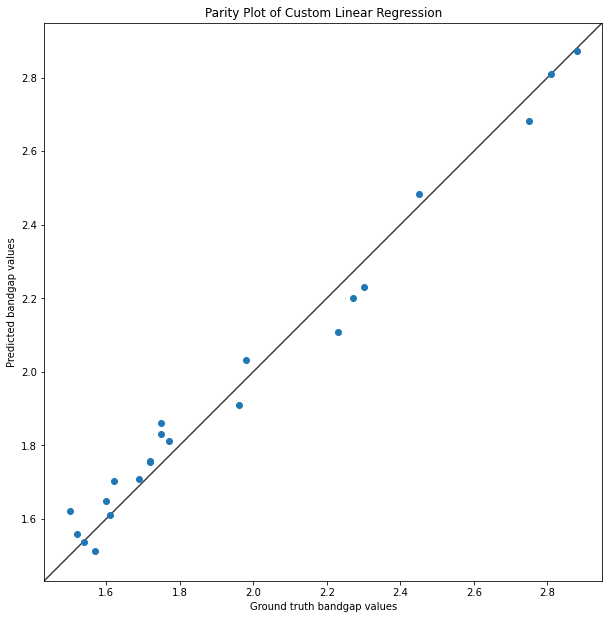

In [7]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

Ridge regression is a regularization technique used to tune our linear regression model that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When we face tbe issue of multicollinearity, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [8]:
# you should not have imported sklearn before this point
import sklearn
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2,0, 1, 5, 10, 20]
rmses=[]
for a in alphas:
    model=Ridge(alpha=a)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmses.append(rmse)
df=pd.DataFrame(list(zip(alphas,rmses)),columns=['alpha','RMSE'])
df

,alpha,RMSE
0,1.000000e-15,0.054319
1,1.000000e-10,0.054319
2,1.000000e-08,0.054319
3,1.000000e-04,0.054318
4,1.000000e-03,0.054309
5,1.000000e-02,0.054222
6,0.000000e+00,0.054319
7,1.000000e+00,0.068291
8,5.000000e+00,0.149718
9,1.000000e+01,0.201012


#### Ans. Explaination
RMSE or Root Mean Squared Error measures the average magnitude of the residuals or error.Here the Alpha value represents the amount by which we want to penalize the model to make it more generic( i.e. underfit). 

The value of alpha typically ranges from 0 - infinity. Higher the alpha coefficient, more generic our model. If the alpha value is very less then the model performs similarly to normal linear regression model. From the above table we can see that with decreasing alpha values the model becomes more accurate and RMSE score decreases. This is due to the fact that the particular dataset we are working on is very simple, so overfitting is very unlikely. Thus increasing the alpha values do not increase the RMSE score. In Ridge Regression, we can see that as the values of alpha increases, RMSE also increases, this is because Ridge Regression tends to make the weights of the parameters close to 0 rather than making it absolutely 0. 

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso regression, or the Least Absolute Shrinkage and Selection Operator, is also a modification of linear regression.It performs L1 regulariation which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients. Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. 

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [10]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
for a in alphas:
    model=Lasso(alpha=a)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmses.append(rmse)
df=pd.DataFrame(list(zip(alphas,rmses)),columns=['alpha','RMSE'])
df

,alpha,RMSE
0,1.000000e-15,0.054319
1,1.000000e-10,0.054319
2,1.000000e-08,0.054319
3,1.000000e-04,0.054318
4,1.000000e-03,0.054309
5,1.000000e-02,0.054222
6,1.000000e+00,0.054319
7,5.000000e+00,0.068291
8,1.000000e+01,0.149718
9,2.000000e+01,0.201012


#### Ans. Explaination
RMSE or Root Mean Squared Error measures the average magnitude of the residuals or error.Here the Alpha value represents the amount by which we want to penalize the model to make it more generic( i.e. underfit). 

The value of alpha typically ranges from 0 - infinity. Higher the alpha coefficient, more generic our model. If the alpha value is very less then the model performs similarly to normal linear regression model. From the above table we can see that with decreasing alpha values the model becomes more accurate and RMSE score decreases. This is due to the fact that the particular dataset we are working on is very simple, so overfitting is very unlikely. Thus increasing the alpha values do not increase the RMSE score. In Lasso Regression, we can see that as the values of alpha increases, RMSE also increases, this is because Ridge Regression tends to make the weights of the parameters close to 0 rather than making it absolutely 0. 